In [1]:
%load_ext autoreload
%autoreload 2
import cv2

In [2]:
vis = cv2.imread("/Users/gimli/Qsync/datasets/Younger_Anthony/vis-reg.png")

In [3]:
%cd ..
import modalities.dir_dataset as dataset

/Users/gimli/projects/igre


In [4]:
xrf, metadata = dataset.load_all_images("/Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif")

Loading image /Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif/ArK_per.tiff
Loading image /Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif/BaL_per.tiff
Loading image /Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif/CaK_per.tiff
Loading image /Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif/CdL_per.tiff
Loading image /Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif/ClK_per.tiff
Loading image /Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif/Continuum_per.tiff
Loading image /Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif/CrK_per.tiff
Loading image /Users/gimli/Qsync/datasets/Younger_Anthony/di_di_0__didimca10_sum.spe_1.1.1.1_corr_per_tif/CuK_per.tiff
Loading image /Users/gimli/Qsync/datasets/

In [5]:
vis = vis/255.0

In [6]:
from src.models.ig import information_gain

In [7]:
diff, approx, net = information_gain(vis[300:500,300:500,:], xrf[0][300:500,300:500,9], training_set_size=50000)

Selecting 50000 samples randomly for use by algorithm.
Adding input layer, width = 3
Adding dense layer, width = 25
Instructions for updating:
Colocations handled automatically by placer.
Adding dense layer, width = 25
Adding dense layer, width = 1
Instructions for updating:
Use tf.cast instead.
Compiling model took 0.1444's.
Train on 32000 samples, validate on 8000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
32000/32000 [==============================] - 4s 125us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 2/20
32000/32000 [==============================] - 2s 57us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 3/20
32000/32000 [==============================] - 2s 55us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 4/20
32000/32000 [==============================] - 2s 50us/s

In [8]:
import matplotlib.pyplot as plt

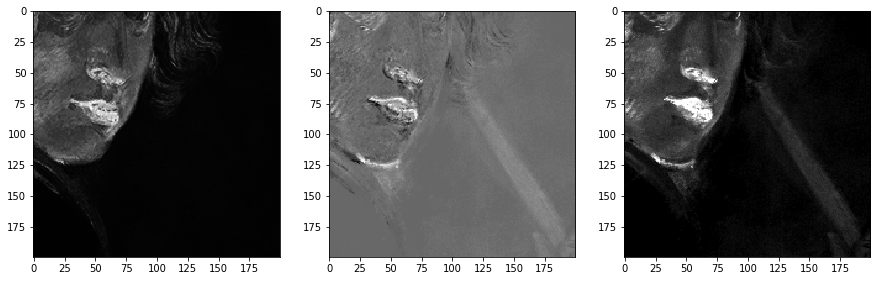

In [9]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.imshow(approx[:,:,0], cmap='gray')
ax = plt.subplot(1,3,2)
ax.imshow(diff[:,:,0], cmap='gray')
ax = plt.subplot(1,3,3)
ax.imshow(xrf[0,300:500,300:500,9], cmap='gray')
plt.show()

In [10]:
xrfp = net.predict(vis.reshape((vis.shape[0]*vis.shape[1], vis.shape[2])))

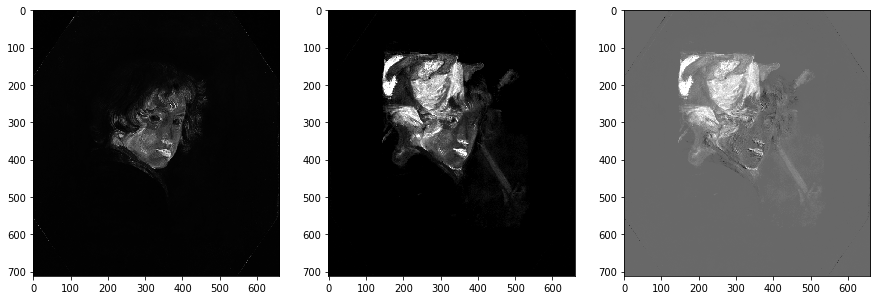

In [11]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
plt.imshow(xrfp.reshape((vis.shape[0], vis.shape[1])), cmap='gray')
ax = plt.subplot(1,3,2)
plt.imshow(xrf[0,:,:,9], cmap='gray')
ax = plt.subplot(1,3,3)
plt.imshow(xrf[0,:,:,9]-xrfp.reshape((vis.shape[0], vis.shape[1])), cmap='gray')
plt.show()

In [12]:
from src.data import rescale_range as rr

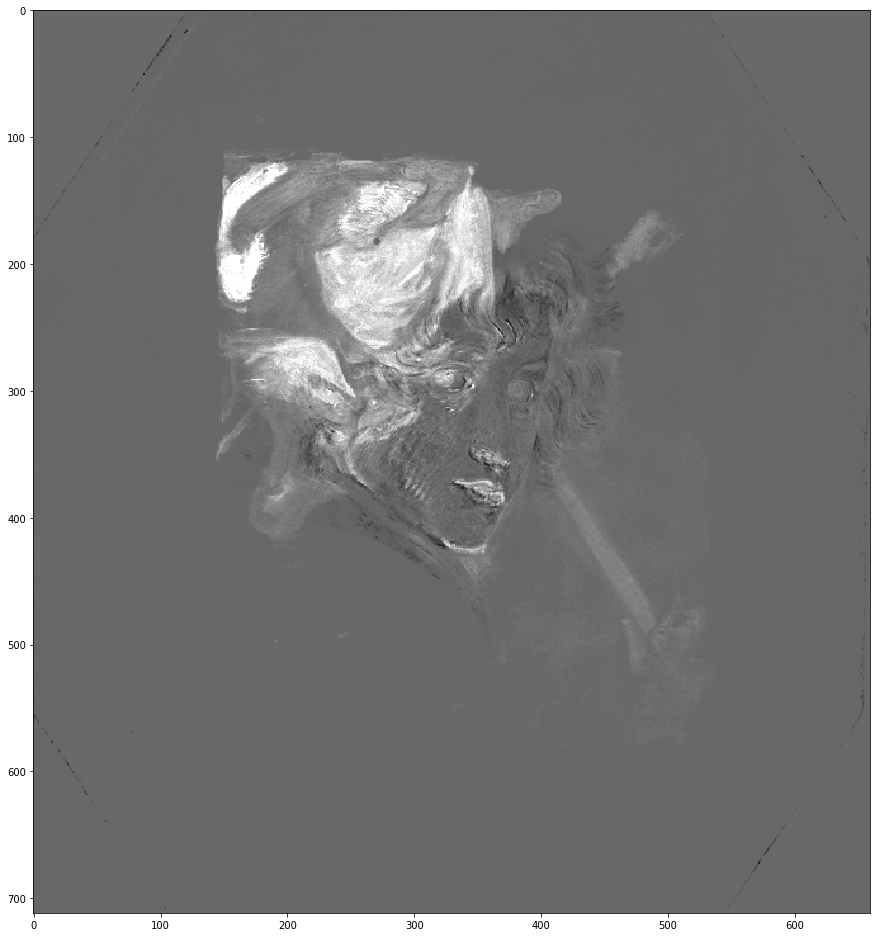

In [13]:
plt.figure(figsize=(15,20))
plt.imshow(rr.rescale_range(xrf[0,:,:,9]-xrfp.reshape((vis.shape[0], vis.shape[1]))), cmap='gray')
plt.show()

In [14]:
cv2.imwrite("/Users/gimli/Qsync/datasets/Younger_Anthony/subtraction.png", 255*
            rr.rescale_range(xrf[0,:,:,9]-xrfp.reshape((vis.shape[0], vis.shape[1]))))

True

In [17]:
cv2.imwrite("/Users/gimli/Qsync/datasets/Younger_Anthony/train-vis.png", vis[300:500,300:500,:]*255)

True

In [18]:
cv2.imwrite("/Users/gimli/Qsync/datasets/Younger_Anthony/train-hgl.png", xrf[0][300:500,300:500,9]*255)

True